##Dependencies

In [ ]:
!pip install qiskit

In [2]:
import qiskit
qiskit.__qiskit_version__

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.5', 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
 from qiskit.tools.jupyter import *

In [ ]:
 
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

##IBM Qiskit

**Creating circuits with Qiskit**
 
To create a quantum circuit, we will import the QuantumCircuit class, and create a new QuantumCircuit object.

In [ ]:
 qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [ ]:
 
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

In [ ]:
 sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [ ]:
 
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [ ]:
 out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


**Note:** Python uses j to represent ii in complex numbers. We see a vector with two complex elements: 0.+0.j = 0, and 1.+0.j = 1.

In [ ]:
 qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

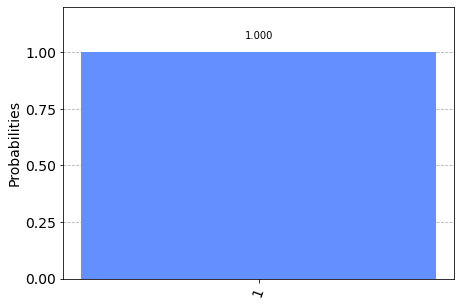

In [ ]:
 qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
 initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [ ]:
 qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


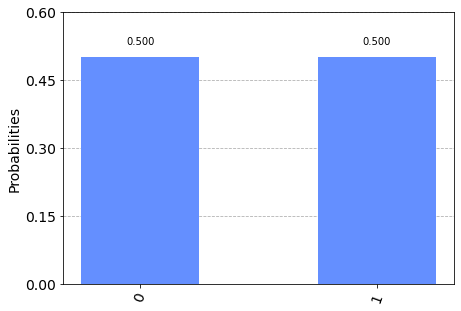

In [ ]:
 qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)